In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,166597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
print(df.dtypes)### so here state is treated as object

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [11]:
df['State'] = df['State'].astype('category')####Used for fixed, repeatable text values.
print(df.dtypes)

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object


In [13]:
df.isnull().sum()

R&D Spend          0
Administration     2
Marketing Spend    1
State              0
Profit             0
dtype: int64

<Axes: >

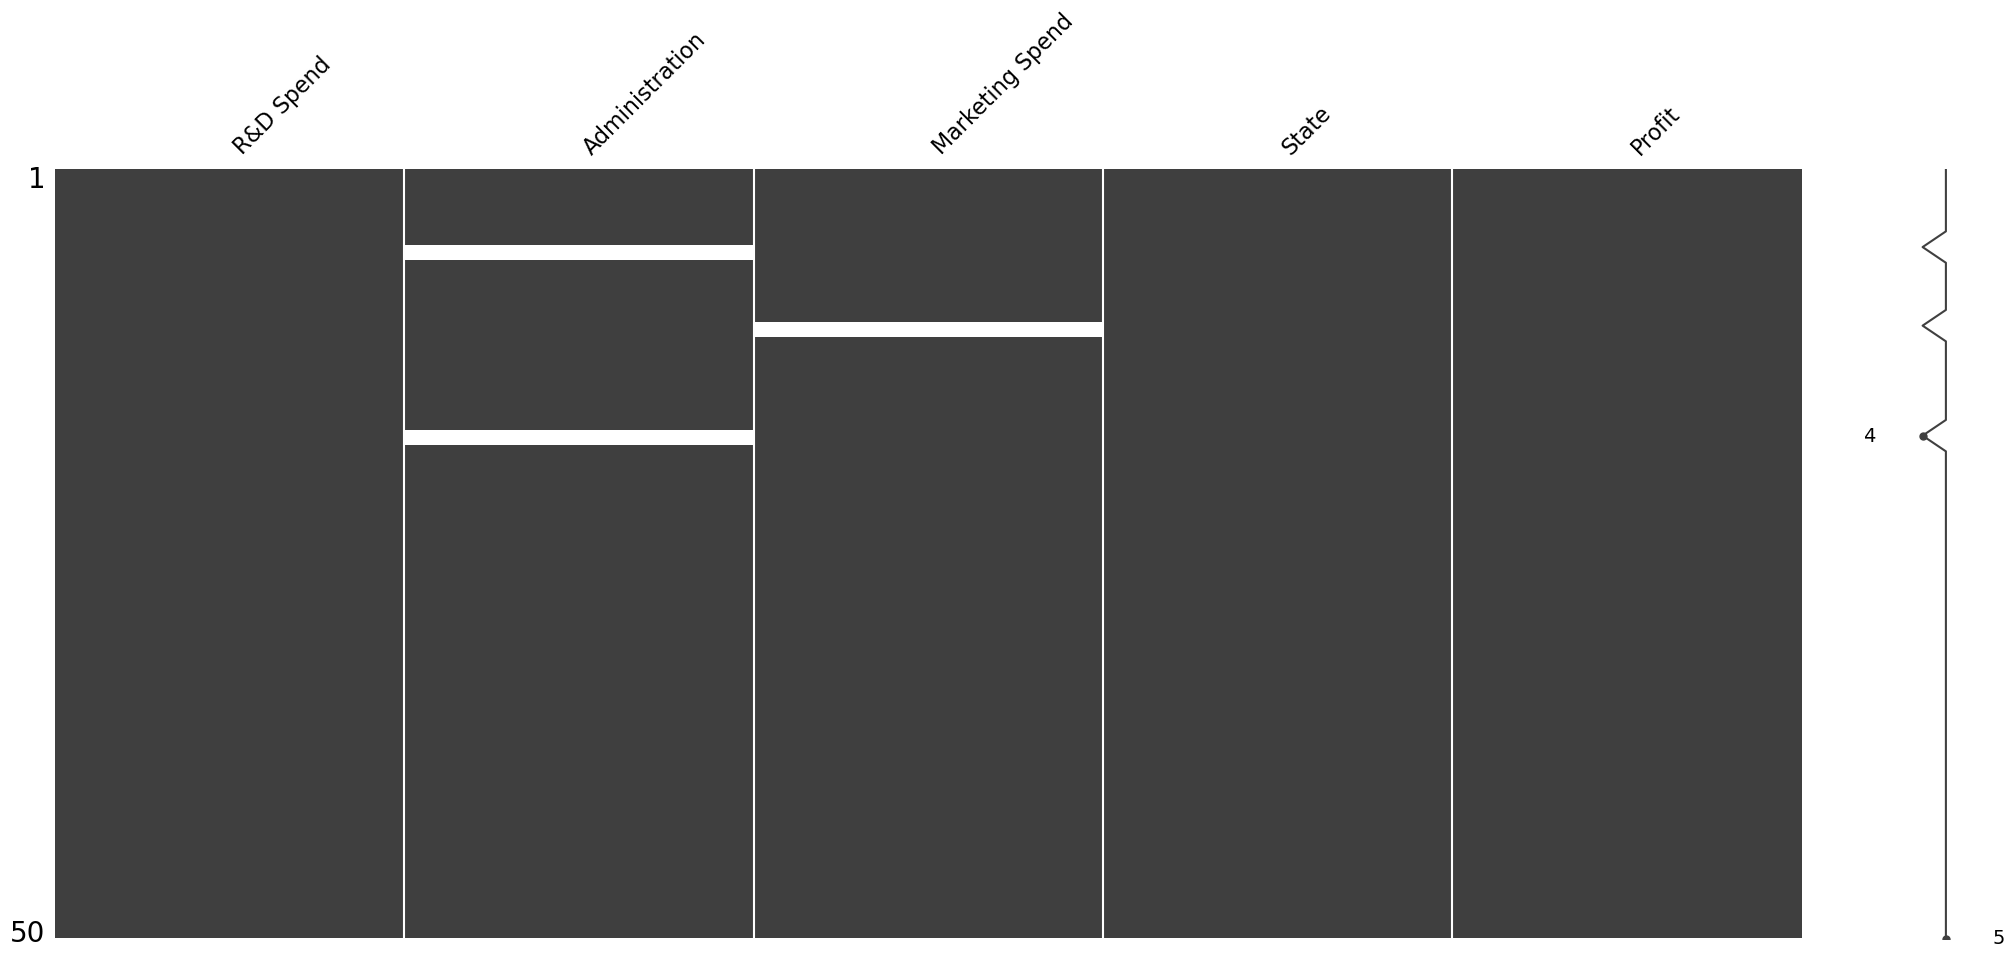

In [16]:
###using library for missing values
import missingno as msno
msno.matrix(df)

In [18]:
m = df['Administration'].median()
print("Administration's median ", m)

Administration's median  122699.795


In [21]:
print(df['Administration'].isna().sum())

2


In [25]:
df['Administration']=df['Administration'].fillna(m) ### so df['Administration'] is actuaaly copy of dataframe we are modify it inplace is for applying it on origianl but it does not do in this case
print(df['Administration'].isna().sum())

0


C:\Users\samar\AppData\Local\Temp\ipykernel_19084\3072587501.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Administration']=df['Administration'].fillna(m) ### so df['Administration'] is actuaaly copy of dataframe we are modify it inplace is for applying it on origianl but it does not do in this case


In [27]:
mean_Marketing_Spend = df['Marketing Spend'].median()
print("Mean of Marketing Spend: ",mean_Marketing_Spend)
### checking null values in it
print(df['Marketing Spend'].isna().sum())

Mean of Marketing Spend:  210797.67
1


In [28]:
df['Marketing Spend'] = df['Marketing Spend'].fillna(mean_Marketing_Spend)
print(df['Marketing Spend'].isna().sum())

0


<Axes: >

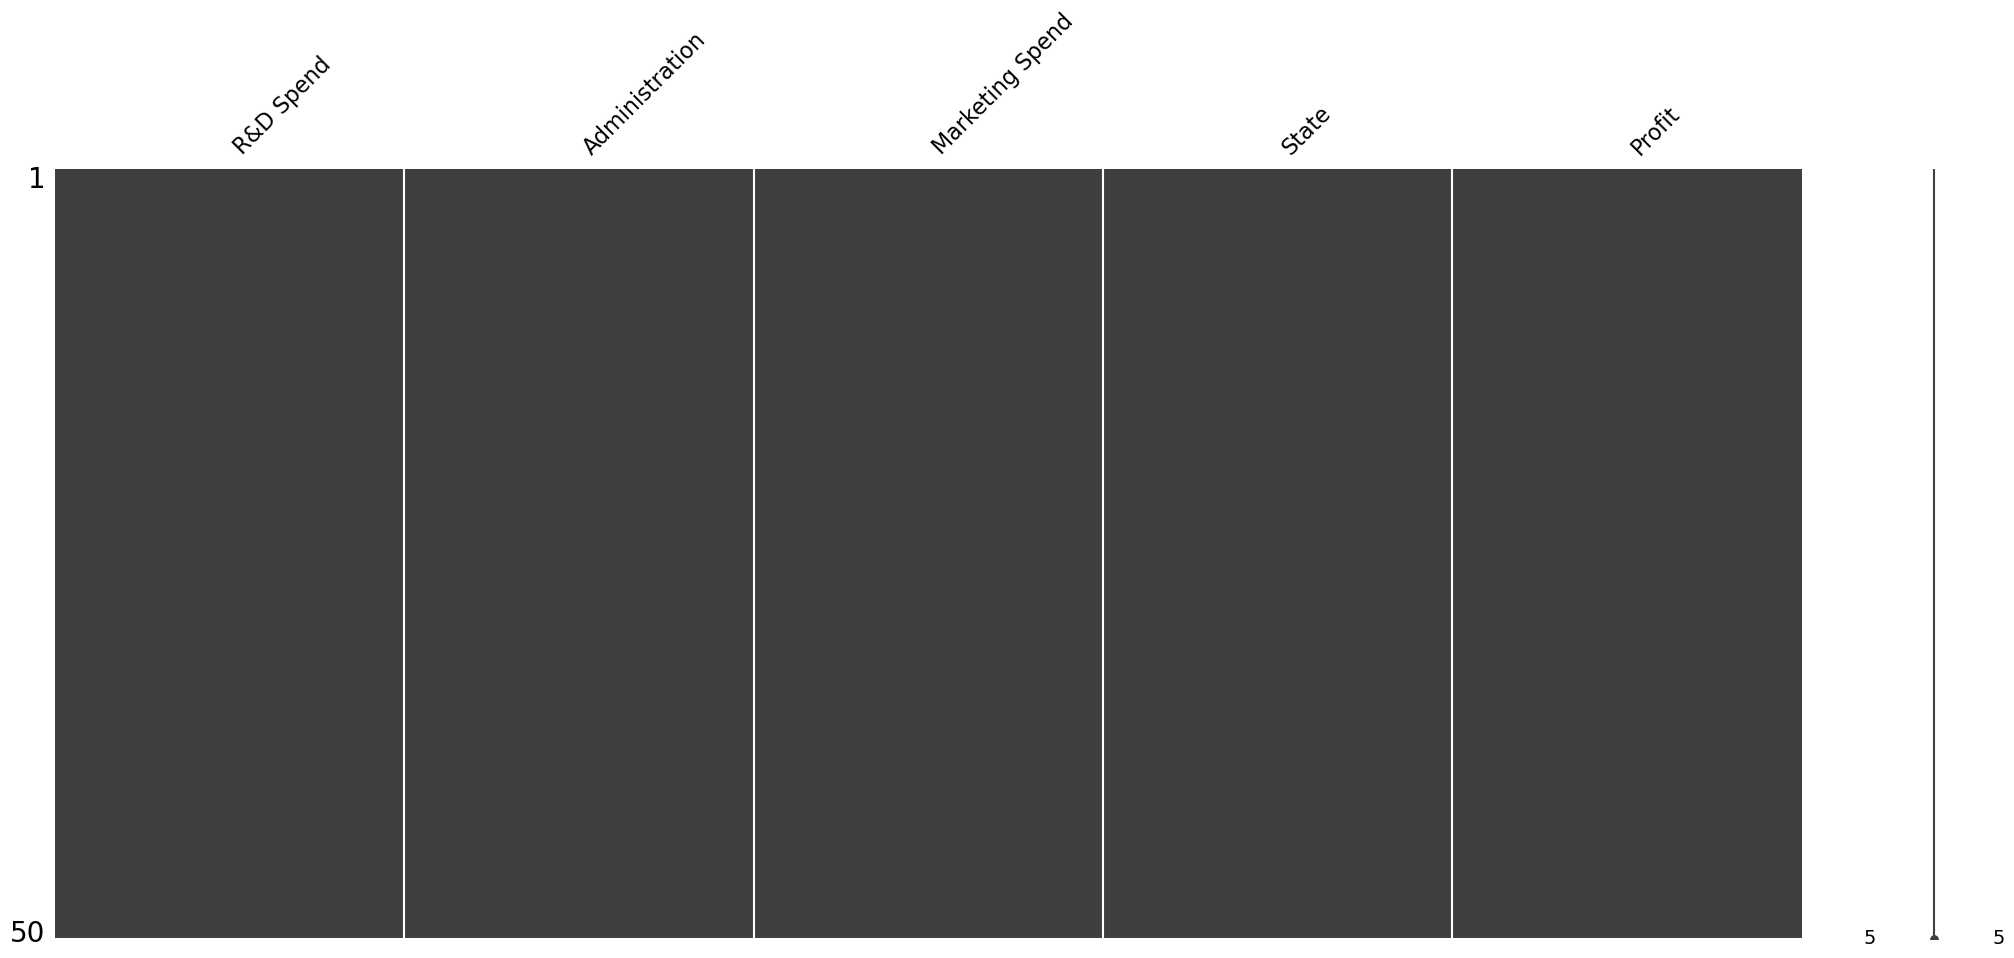

In [29]:
msno.matrix(df)

In [35]:
### so in data we have something in text we will ocnvert it into number called encoding categoril featues
df_encoded = pd.get_dummies(df, columns=['State'], dtype=np.float64)
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,122699.795,471784.10,192261.83,0.0,0.0,1.0
1,166597.70,122699.795,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,122699.795,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,122699.795,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,122699.795,366168.42,166187.94,0.0,1.0,0.0


In [37]:
df_encoded.rename(columns={'R&D Spend': 'R&D_Spend',
                          'Marketing Spend': 'Marketing_Spend',
                          'State_New York': 'State_New_York'}, inplace=True)
df_encoded.head()

,R&D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,122699.795,471784.10,192261.83,0.0,0.0,1.0
1,166597.70,122699.795,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,122699.795,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,122699.795,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,122699.795,366168.42,166187.94,0.0,1.0,0.0
